In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors
from matplotlib.colors import ListedColormap
import seaborn as sns
import statistics 
from plotnine import *
import plotly.express as px
import plotly.graph_objects as go


from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, ShuffleSplit, learning_curve

from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline, make_pipeline

from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report

In [2]:
path = "../DataSet/"
df = pd.read_csv(path + 'Dataset_Final.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NotValid,TotalSatisfaction,ProbablyLeave
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,...,20,2.0,2,8.0,7,2,13,False,11,0
1,36.0,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,...,21,3.0,3,1.0,8,1,6,True,11,1
2,36.0,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,Male,...,7,4.0,3,1.0,5,1,2,False,13,0
3,33.0,No,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,...,12,1.0,3,3.0,7,0,7,False,9,1
4,37.0,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,...,2,3.0,3,10.0,2,2,1,True,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,38.0,No,Travel_Rarely,890,Sales,2,3,Marketing,4,Male,...,2,3.0,3,8.0,2,2,2,True,12,0
1466,44.0,No,Travel_Rarely,1111,Sales,8,2,Life Sciences,3,Male,...,6,5.0,3,4.0,2,1,2,False,9,0
1467,30.0,No,Travel_Rarely,163,Research & Development,24,1,Technical Degree,4,Male,...,9,3.0,2,1.0,4,1,4,False,15,0
1468,36.0,No,Travel_Frequently,457,Research & Development,26,2,Other,2,Male,...,4,3.0,2,8.0,2,1,3,True,9,1


# Trasformazione variabili
- Categoriche => One Hot Encoding

In [3]:
df_copy = df.copy()

In [4]:
df_copy["IsMale"] = [1 if x else 0 for x in df_copy["Gender"] == "Male"]
df_copy["NotValid"] = [1 if x else 0 for x in df_copy["NotValid"] == True]
df_copy["Attrition"] = [1 if x else 0 for x in df_copy["Attrition"] == "Yes"]
df_copy["ProbablyLeave"] = [1 if x else 0 for x in df_copy["ProbablyLeave"] == "Yes"]
df_copy = df_copy.drop(columns = ["Gender"])

In [5]:
cat_features=["BusinessTravel", "Department", "EducationField","MaritalStatus", "JobRole", "OverTime"]
enc = OneHotEncoder(handle_unknown='ignore')
X = df_copy[cat_features]
enc.fit(X)

OneHotEncoder(handle_unknown='ignore')

In [6]:
df_copy=df_copy.drop(columns = cat_features)
df_copy[enc.get_feature_names(cat_features)] = enc.transform(X).toarray()

In [7]:
df_copy.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_No,OverTime_Yes
0,52.0,0,593,9,4,2,88,3,3,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,36.0,0,1218,1,1,2,52,3,5,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,36.0,0,530,16,3,3,36,3,2,4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,33.0,0,953,5,4,2,65,3,1,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,37.0,0,1380,9,2,3,75,3,1,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


- Numeriche => RobustScaler

In [8]:
df_normalized = df_copy.copy()

In [9]:
numeric_features = ["Age", "DailyRate", "DistanceFromHome", "Education", "HourlyRate",
                   "JobInvolvement", "JobLevel", "JobSatisfaction", "MonthlyIncome",
                   "NumCompaniesWorked", "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction",
                   "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "WorkLifeBalance",
                   "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion",
                   "YearsWithCurrManager", "TotalSatisfaction"]

In [10]:
scaler = RobustScaler()
scaled_features = scaler.fit_transform(df_normalized[numeric_features])
df_normalized[numeric_features] = scaled_features

In [11]:
class_name = 'Attrition'

## Definizione funzioni per stampare e plottare risultati

In [12]:
# Funzione che viene chiamata sul:
# - y_true: target reale
# - y_pred: target predetto dal classificatore
# stampa: matrice di confusione, accuracy, precision, recall, specificity, F1
def result_pred(y_true, y_pred):
    print("**** Matrice di Confusione *****")
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    print(' True negative: %d False negative: %d' % (tn, fn))
    print(' True positive: %d False positive: %d' % (tp, fp))
    print("____________________________________________")

    # Calcolo dell'accuracy
    print("***** Calcolo dell'accuracy *****")
    accuracy = accuracy_score(y_true, y_pred)    
    print('Frazione di campioni correttamente correlati: %0.4f' % accuracy)
    accuracy = accuracy_score(y_true, y_pred, False)
    print("Numero di campioni correttamente correlati: ", accuracy)    
    print("____________________________________________")

    # Calcolo della precision
    print("**** Calcolo della precisione *****")
    #Percentuale di classificazioni positive che sono corrette
    #se dico "positivo" dico giusto?
    precision = precision_score(y_true, y_pred)
    print('Percentuale di classificazioni positive che sono corrette: %0.4f' % precision)   
    print("____________________________________________")    

    # Calcolo della recall
    print("**** Calcolo della recall (sensitivity) *****")
    recall = recall_score(y_true, y_pred)
    print('Percentuale di elementi positivi del testing set che sono stati classificati come positivi: %0.4f' % recall)
    print("____________________________________________")    

    # Calcolo della specificity
    print("**** Calcolo della specificity *****")
    specificity = tn / (tn+fp)
    print('Percentuale di elementi negativi del testing set che sono stati classificati come negativi: %0.4f' % specificity)
    print("____________________________________________")   
    
    # Calcolo dell'F1 score
    print("**** Calcolo della F1 score *****")
    f1 = f1_score(y_true, y_pred)
    #Il punteggio F1 può essere interpretato come una media ponderata della precisione e della recall, 
    #in cui un punteggio F1 raggiunge il suo valore migliore a 1 e il punteggio peggiore a 0.
    print('F1 scores: %0.4f' % f1)
    print("____________________________________________")   
    
    # Stampiamo le stesse statistiche dalla funzione report
    print(classification_report(y_true, y_pred))
    
    print("Con le tecniche viste finora non viene fornita nessuna informazione sulla “gravità” degli errori (“errore lieve” oppure “errore grave)")
    print("per questo si usano la curva CMC, la curva ROC")

In [13]:
# La funzione stampa il ROC curve

# Prima di chiamare questa funzione dobbiamo aver
# scritto in y_pred il valore di ".predict" che come output fornirà 0 o 1
# dentro a y_score il valore di ".predict_proba" che darà solo la probabilità di 1
def plot_res(y_pred, y_score, y_test):
    #ROC CURVE: implementazione legata esclusivamente all'attività di classificazione binaria
    #false positive rate, true positive rate
    print("****** ROC CURVE + AUC?: passo passo *******")
    fprate, tprate, threashold = roc_curve(y_test, y_score[:, 1])
    auc_score = auc(fprate, tprate)
    plt.plot(fprate, tprate, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (auc_score))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.legend(loc="lower right", fontsize=14, frameon=False)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.show()

    print("____________________________________")
    print("****** VALORE DI AUC *******")    
    print(roc_auc_score(y_test, y_score[:,1]))    
    
    print("____________________________________")
    print("****** ROC CURVE: con metodo diretto *******")
    plot_roc(y_test, y_score)
    plt.show()
    
    print("____________________________________")
    print("****** Precision recall: con metodo diretto *******")
    plot_precision_recall(y_test, y_score)
    plt.show()
    

    print("____________________________________")
    print("****** Cumulative gain: con metodo diretto *******")
    plot_cumulative_gain(y_test, y_score)
    plt.show()
    
    
    print("____________________________________")
    print("****** Lift curve: con metodo diretto *******")    
    plot_lift_curve(y_test, y_score)
    plt.show()

## Funzione per plottare il learning curve

In [14]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")
    return plt

## GridSearch

In [15]:
def builtGridSearch(X, y, split_size, tuned_parameters, scores, kfold):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size, random_state=1000, stratify=y)
    optimals = {}
    for score in scores:
        print("------- Score = " + str(score) + " ------- \n")
        model = KNeighborsClassifier()
        k_fold = StratifiedKFold(n_splits=kfold, random_state=42)
        
        print("> Fold = " + str(k_fold) + "\n")
        clf = GridSearchCV(model, tuned_parameters, cv=k_fold, scoring=score, return_train_score=True)

        clf.fit(X_train, y_train)

        print("> Best Parameter set: \n")
        best = clf.best_params_
        print(best)
        
        print("\n> Grid scores:\n")
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']

        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']

        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))

        print("-> Report\n") 
        y_true, y_pred = y_test, clf.predict(X_test)
        print(classification_report(y_true, y_pred))
        print("\n")
        print("**** Matrice di Confusione *****")
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        print(' True negative: %d False negative: %d' % (tn, fn))
        print(' True positive: %d False positive: %d' % (tp, fp))
        
        
        print("...........RESULTS FOR TRAINING.........")
        print("........................................")
        means = clf.cv_results_['mean_train_score']
        stds = clf.cv_results_['std_train_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))        
        
        print("____________________________________________")
        
        optimals[score] = best
    return optimals

In [16]:
attributes = [col for col in df_normalized.columns if col !=class_name]

X = df_normalized[attributes].values
y = df_normalized[class_name]

In [17]:
tuned_parameters = {
    'n_neighbors': list(range(2, 30)),
    'weights': ['uniform', 'distance'],
    'metric': ["euclidean", "manhattan", "minkowski"]
}
scores = ["f1", "recall", "roc_auc"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify = y)
optimal = builtGridSearch(X_train, y_train, 0.3, tuned_parameters, scores, 5)

------- Score = f1 ------- 

> Fold = StratifiedKFold(n_splits=5, random_state=42, shuffle=False)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


> Best Parameter set: 

{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}

> Grid scores:

0.132 (+/-0.057) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.185 (+/-0.065) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.174 (+/-0.063) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.187 (+/-0.043) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.091 (+/-0.113) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.198 (+/-0.049) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.124 (+/-0.098) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.213 (+/-0.058) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.047 (+/-0.077) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.189 (+/-0.096) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
0.102 (+/-0.067) for {'metric': 'euclid

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


> Best Parameter set: 

{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}

> Grid scores:

0.078 (+/-0.036) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.181 (+/-0.062) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.130 (+/-0.057) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.164 (+/-0.034) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.052 (+/-0.065) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.164 (+/-0.034) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.078 (+/-0.065) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.172 (+/-0.049) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.026 (+/-0.042) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.146 (+/-0.083) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
0.061 (+/-0.043) for {'metric': 'euclid

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


> Best Parameter set: 

{'metric': 'euclidean', 'n_neighbors': 16, 'weights': 'uniform'}

> Grid scores:

0.516 (+/-0.036) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.514 (+/-0.028) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.517 (+/-0.083) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.510 (+/-0.056) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.534 (+/-0.070) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.519 (+/-0.053) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.541 (+/-0.088) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.528 (+/-0.075) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.530 (+/-0.089) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.525 (+/-0.081) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
0.524 (+/-0.142) for {'metric': 'euclid

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
optimal

{'f1': {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'},
 'recall': {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'},
 'roc_auc': {'metric': 'euclidean', 'n_neighbors': 16, 'weights': 'uniform'}}

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1000, stratify=y_train)

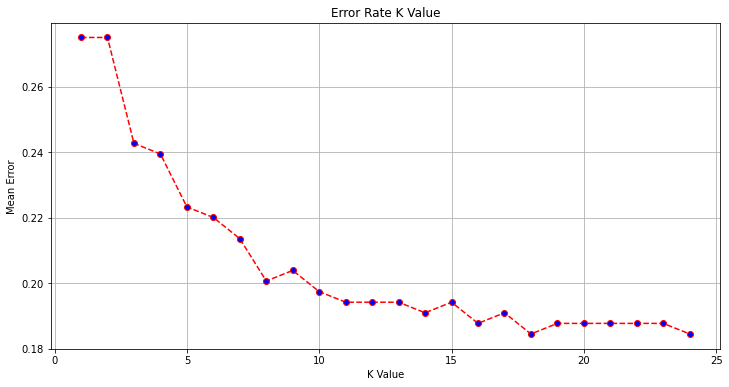

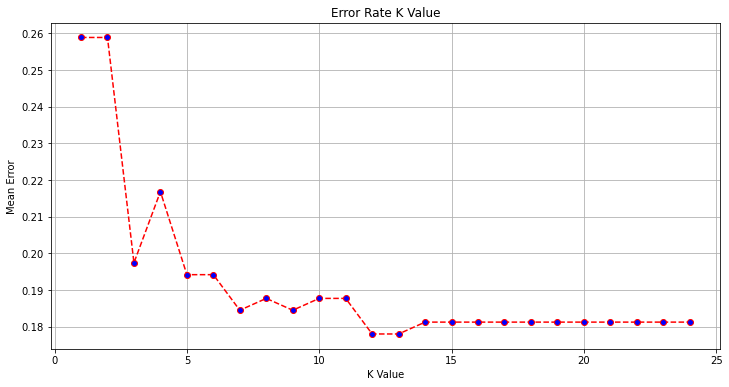

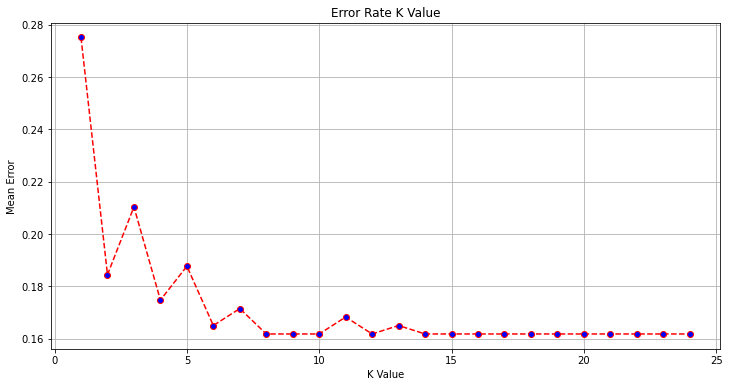

In [23]:
error = []

for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance', metric="euclidean")
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    error.append(np.mean(pred_i != y_val))
plt.figure(figsize=(12, 6))
plt.plot(range(1,25), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue')
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid()

error = []

for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance', metric="manhattan")
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    error.append(np.mean(pred_i != y_val))
plt.figure(figsize=(12, 6))
plt.plot(range(1,25), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue')
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid()

error = []

for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform', metric="euclidean")
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    error.append(np.mean(pred_i != y_val))
plt.figure(figsize=(12, 6))
plt.plot(range(1,25), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue')
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid()


- Optimal F1

309
309
**** Matrice di Confusione *****
 True negative: 235 False negative: 45
 True positive: 5 False positive: 24
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.7767
Numero di campioni correttamente correlati:  240
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.1724
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 0.1000
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.9073
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.1266
____________________________________________
              precision    recall  f1-scor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass normalize=False as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


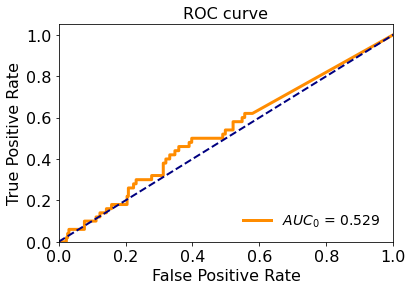

____________________________________
****** VALORE DI AUC *******
0.528918918918919
____________________________________
****** ROC CURVE: con metodo diretto *******


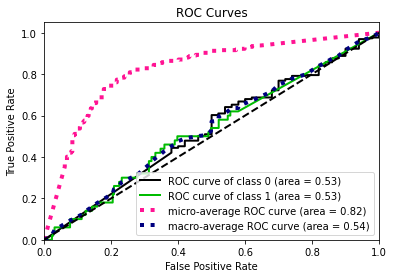

____________________________________
****** Precision recall: con metodo diretto *******


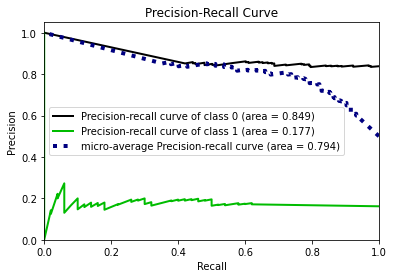

____________________________________
****** Cumulative gain: con metodo diretto *******


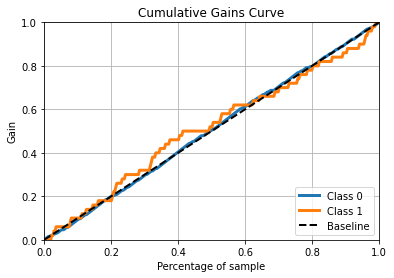

____________________________________
****** Lift curve: con metodo diretto *******


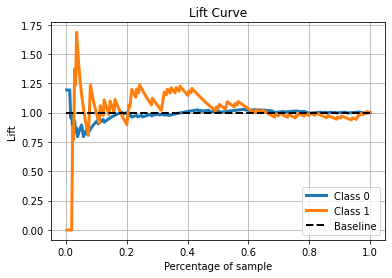

In [24]:
model = KNeighborsClassifier(n_neighbors=5, weights='distance', metric="euclidean")
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(len(y_pred))
print(len(y_val))
result_pred(y_val, y_pred)
y_score = model.predict_proba(X_val)
plot_res(y_pred, y_score, y_val)

- Optimal Recall

309
309
**** Matrice di Confusione *****
 True negative: 219 False negative: 40
 True positive: 10 False positive: 40
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.7411
Numero di campioni correttamente correlati:  229
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.2000
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 0.2000
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.8456
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.2000
____________________________________________
              precision    recall  f1-sco

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass normalize=False as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


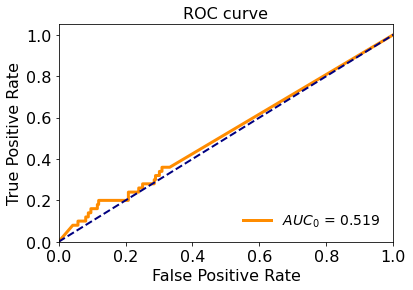

____________________________________
****** VALORE DI AUC *******
0.518996138996139
____________________________________
****** ROC CURVE: con metodo diretto *******


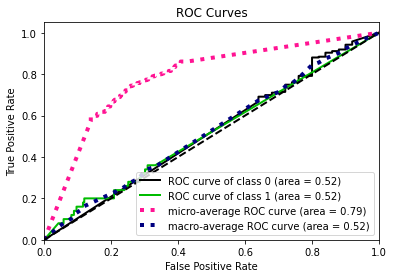

____________________________________
****** Precision recall: con metodo diretto *******


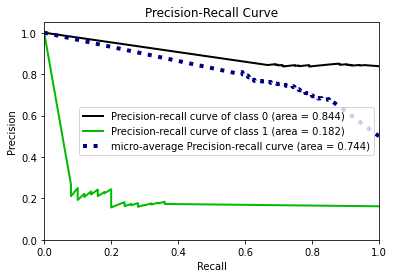

____________________________________
****** Cumulative gain: con metodo diretto *******


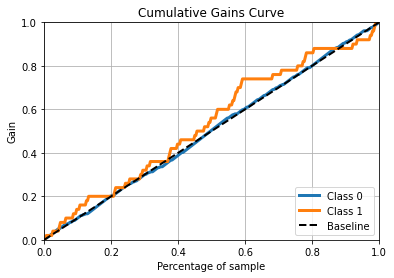

____________________________________
****** Lift curve: con metodo diretto *******


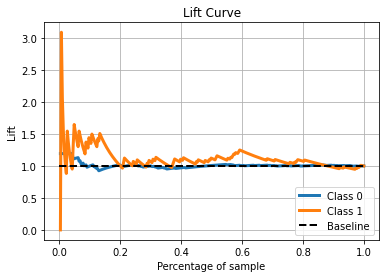

In [25]:
model = KNeighborsClassifier(n_neighbors=2, weights='distance', metric="manhattan")
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(len(y_pred))
print(len(y_val))
result_pred(y_val, y_pred)
y_score = model.predict_proba(X_val)
plot_res(y_pred, y_score, y_val)

- Optimal Roc

309
309
**** Matrice di Confusione *****
 True negative: 259 False negative: 50
 True positive: 0 False positive: 0
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.8382
Numero di campioni correttamente correlati:  259
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.0000
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 0.0000
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 1.0000
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.0000
____________________________________________
              precision    recall  f1-score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass normalize=False as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


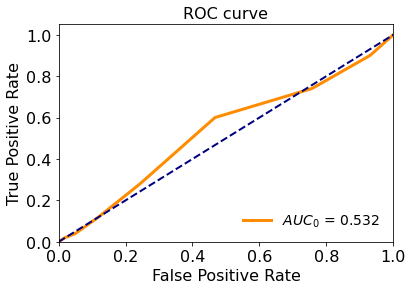

____________________________________
****** VALORE DI AUC *******
0.5324324324324324
____________________________________
****** ROC CURVE: con metodo diretto *******


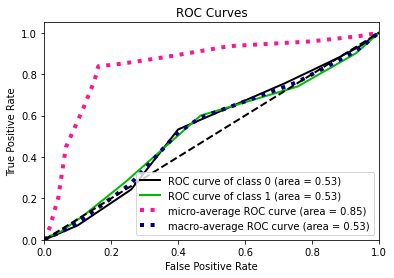

____________________________________
****** Precision recall: con metodo diretto *******


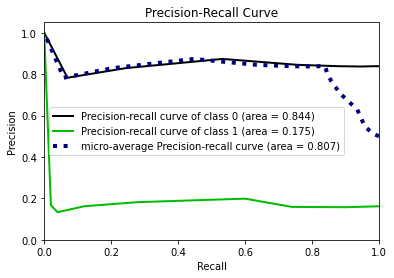

____________________________________
****** Cumulative gain: con metodo diretto *******


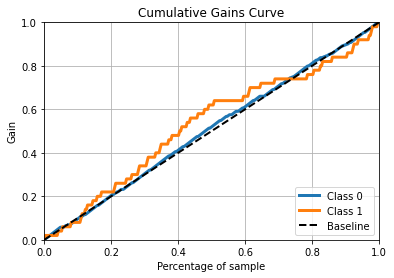

____________________________________
****** Lift curve: con metodo diretto *******


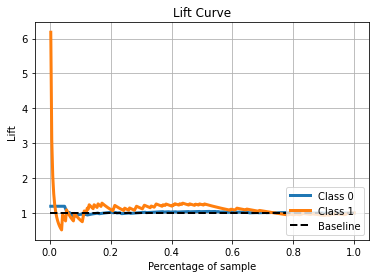

In [26]:
model = KNeighborsClassifier(n_neighbors=16, weights='uniform', metric="euclidean")
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(len(y_pred))
print(len(y_val))
result_pred(y_val, y_pred)
y_score = model.predict_proba(X_val)
plot_res(y_pred, y_score, y_val)

In [20]:
def plot_dt3(X, y):
    
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))

    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    estimator = KNeighborsClassifier(n_neighbors=5, weights='distance', metric="euclidean")
    title = "Optimal Parameters for F1"
    plot_learning_curve(estimator, title, X, y, axes=axes[0], ylim=(0.3, 1.01),
                        cv=cv, n_jobs=10)

    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    estimator = KNeighborsClassifier(n_neighbors=2, weights='distance', metric="manhattan")
    title = "Optimal Parameters for Recall"
    plot_learning_curve(estimator, title, X, y, axes=axes[1], ylim=(0.3, 1.01),
                        cv=cv, n_jobs=10)
    
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    estimator = KNeighborsClassifier(n_neighbors=16, weights='uniform', metric="euclidean")
    title = "Optimal Parameters for ROC_AUC"
    plot_learning_curve(estimator, title, X, y, axes=axes[2], ylim=(0.3, 1.01),
                        cv=cv, n_jobs=10)
    plt.show()

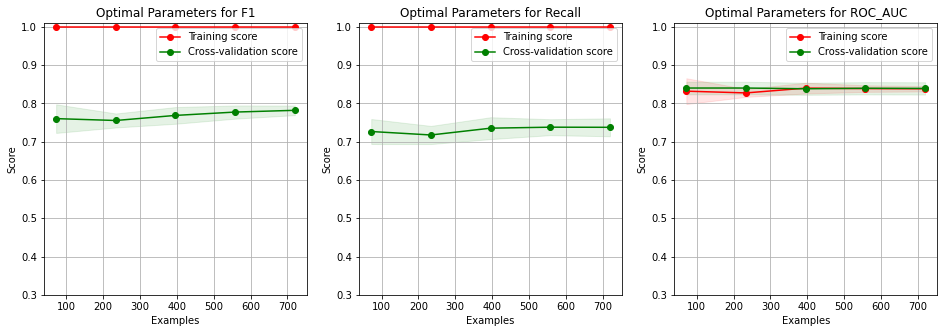

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)
plot_dt3(X_train, y_train)

# Selezione Features rilevanti

In [25]:
#features = ["MaritalStatus_Single", "OverTime_Yes", "JobLevel", 
#            "TotalWorkingYears", "StockOptionLevel", "EducationField_Technical Degree", 
#            "NumCompaniesWorked", "TotalSatisfaction", "EnvironmentSatisfaction"]
features = ["MaritalStatus_Single", "OverTime_Yes", "JobLevel", 
            "TotalWorkingYears", "StockOptionLevel"]
X = df_normalized[features].values
y = df_normalized[class_name]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify = y)
optimal = builtGridSearch(X_train, y_train, 0.3, tuned_parameters, scores, 5)

------- Score = f1 ------- 

> Fold = StratifiedKFold(n_splits=5, random_state=42, shuffle=False)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


> Best Parameter set: 

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}

> Grid scores:

0.221 (+/-0.185) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.254 (+/-0.132) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.413 (+/-0.075) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.350 (+/-0.120) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.284 (+/-0.112) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.303 (+/-0.158) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.367 (+/-0.110) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.306 (+/-0.109) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.287 (+/-0.180) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.279 (+/-0.180) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
0.298 (+/-0.160) for {'metric': 'euclide

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


> Best Parameter set: 

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}

> Grid scores:

0.147 (+/-0.142) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.208 (+/-0.131) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.354 (+/-0.092) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.320 (+/-0.183) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.198 (+/-0.088) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.251 (+/-0.172) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.284 (+/-0.087) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.251 (+/-0.119) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.189 (+/-0.129) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.225 (+/-0.171) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
0.207 (+/-0.115) for {'metric': 'euclide

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


> Best Parameter set: 

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}

> Grid scores:

0.659 (+/-0.054) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.636 (+/-0.062) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.700 (+/-0.065) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.674 (+/-0.077) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.708 (+/-0.054) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.675 (+/-0.076) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.701 (+/-0.057) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.674 (+/-0.085) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.705 (+/-0.079) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.671 (+/-0.086) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
0.693 (+/-0.087) for {'metric': 'euclide

In [27]:
optimal

{'f1': {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'},
 'recall': {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'},
 'roc_auc': {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}}

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1000, stratify=y_train)

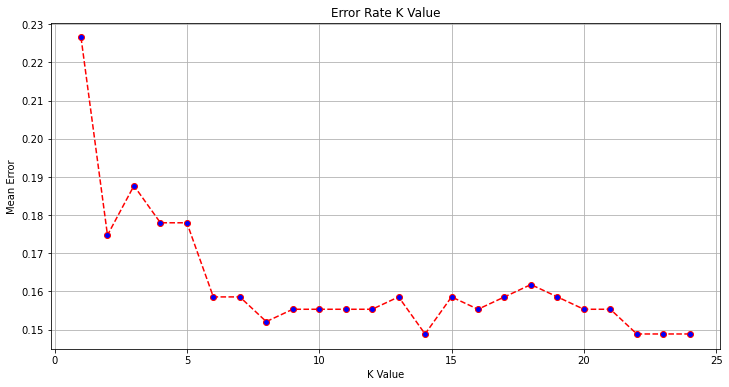

In [29]:
error = []

for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform', metric="manhattan")
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    error.append(np.mean(pred_i != y_val))
plt.figure(figsize=(12, 6))
plt.plot(range(1,25), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue')
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid()

309
309
**** Matrice di Confusione *****
 True negative: 233 False negative: 32
 True positive: 18 False positive: 26
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.8123
Numero di campioni correttamente correlati:  251
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.4091
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 0.3600
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.8996
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.3830
____________________________________________
              precision    recall  f1-sco

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass normalize=False as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


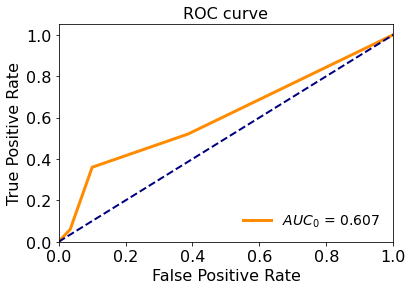

____________________________________
****** VALORE DI AUC *******
0.607104247104247
____________________________________
****** ROC CURVE: con metodo diretto *******


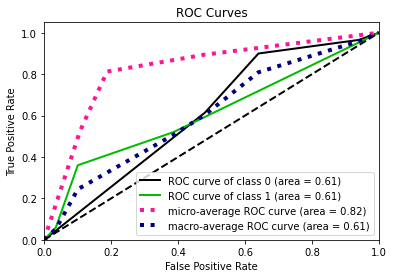

____________________________________
****** Precision recall: con metodo diretto *******


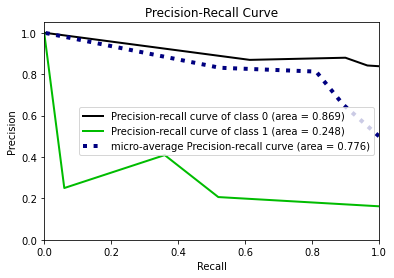

____________________________________
****** Cumulative gain: con metodo diretto *******


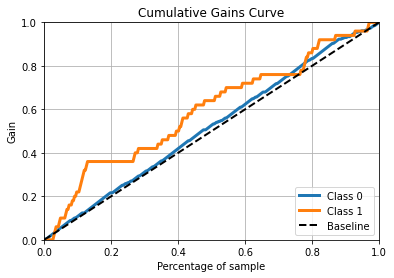

____________________________________
****** Lift curve: con metodo diretto *******


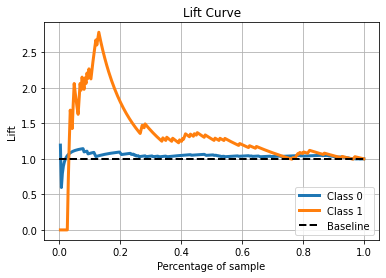

In [30]:
model = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric="manhattan")
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(len(y_pred))
print(len(y_val))
result_pred(y_val, y_pred)
y_score = model.predict_proba(X_val)
plot_res(y_pred, y_score, y_val)

In [40]:
def plot_dt3(X, y):
    
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))

    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    estimator = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric="manhattan")
    title = "Learning Curve Knn"
    plot_learning_curve(estimator, title, X, y, axes=axes[0], ylim=(0.3, 1.01),
                        cv=cv, n_jobs=10)

    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    estimator = KNeighborsClassifier(n_neighbors=4, weights='uniform', metric="manhattan")
    title = "Learning Curve Knn"
    plot_learning_curve(estimator, title, X, y, axes=axes[1], ylim=(0.3, 1.01),
                        cv=cv, n_jobs=10)

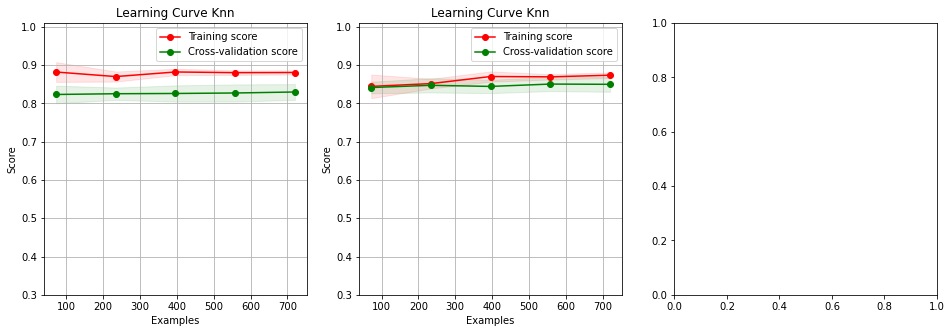

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)
plot_dt3(X_train, y_train)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)

**** Matrice di Confusione *****
 True negative: 334 False negative: 41
 True positive: 30 False positive: 36
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.8254
Numero di campioni correttamente correlati:  364
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.4545
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 0.4225
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.9027
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.4380
____________________________________________
              precision    recall  f1-score   sup

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass normalize=False as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


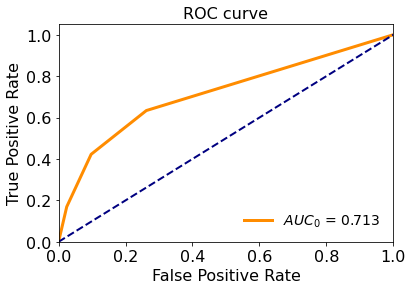

____________________________________
****** VALORE DI AUC *******
0.7134564141606394
____________________________________
****** ROC CURVE: con metodo diretto *******


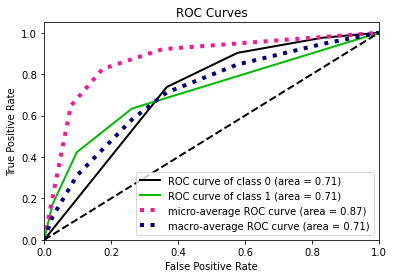

____________________________________
****** Precision recall: con metodo diretto *******


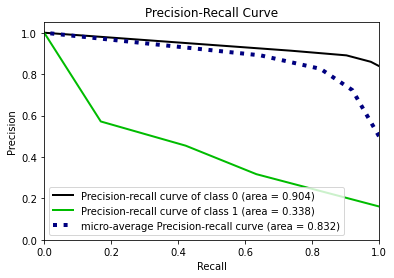

____________________________________
****** Cumulative gain: con metodo diretto *******


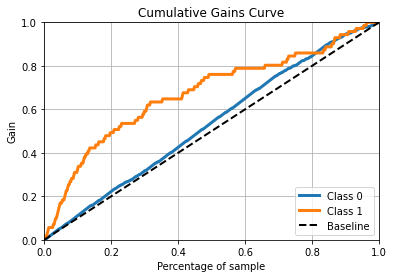

____________________________________
****** Lift curve: con metodo diretto *******


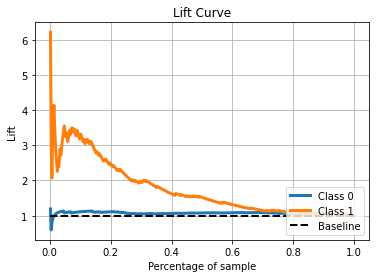

In [42]:
model = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric="manhattan")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
result_pred(y_test, y_pred)
y_score = model.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

# ------- Test KNN con Oversampling -------

In [51]:
def builtOverTrGridSearch(X, y, split_size, tuned_parameters, scores, kfold):
    rus = RandomOverSampler(random_state=42)
    X_res, y_res = rus.fit_resample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=split_size, random_state=1000, stratify=y_res)
    

    optimals = {}
    for score in scores:
        print("------- Score = " + str(score) + " ------- \n")
        model = KNeighborsClassifier()
        k_fold = StratifiedKFold(n_splits=kfold, random_state=42)
        
        print("> Fold = " + str(k_fold) + "\n")
        clf = GridSearchCV(model, tuned_parameters, cv=k_fold, scoring=score)

        clf.fit(X_train, y_train)

        print("> Best Parameter set: \n")
        best = clf.best_params_
        print(best)
        
        print("\n> Grid scores:\n")
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']

        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']

        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))

        print("-> Report\n") 
        y_true, y_pred = y_test, clf.predict(X_test)
        print(classification_report(y_true, y_pred))
        print("\n")
        print("**** Matrice di Confusione *****")
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        print(' True negative: %d False negative: %d' % (tn, fn))
        print(' True positive: %d False positive: %d' % (tp, fp))
        print("____________________________________________")
        
        optimals[score] = best
    return optimals

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)

In [49]:
optimal = builtOverTrGridSearch(X_train, y_train, 0.3, tuned_parameters, scores, 5)

------- Score = f1 ------- 

> Fold = StratifiedKFold(n_splits=5, random_state=42, shuffle=False)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


> Best Parameter set: 

{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}

> Grid scores:

0.868 (+/-0.040) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.914 (+/-0.018) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.846 (+/-0.029) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.884 (+/-0.023) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.781 (+/-0.057) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.887 (+/-0.024) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.783 (+/-0.068) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.880 (+/-0.026) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.762 (+/-0.083) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.882 (+/-0.022) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
0.772 (+/-0.098) for {'metric': 'euclid

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


> Best Parameter set: 

{'metric': 'manhattan', 'n_neighbors': 25, 'weights': 'distance'}

> Grid scores:

0.876 (+/-0.080) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.972 (+/-0.039) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.917 (+/-0.070) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.978 (+/-0.025) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.773 (+/-0.082) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.978 (+/-0.025) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.814 (+/-0.104) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.982 (+/-0.022) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.737 (+/-0.108) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.978 (+/-0.025) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
0.786 (+/-0.131) for {'metric': 'eucli

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


> Best Parameter set: 

{'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'distance'}

> Grid scores:

0.907 (+/-0.019) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.921 (+/-0.018) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.889 (+/-0.036) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.934 (+/-0.030) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.873 (+/-0.041) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.951 (+/-0.028) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.866 (+/-0.053) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.964 (+/-0.019) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.857 (+/-0.072) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.968 (+/-0.017) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
0.847 (+/-0.082) for {'metric': 'eucli

In [53]:
optimal

{'f1': {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'},
 'recall': {'metric': 'manhattan', 'n_neighbors': 25, 'weights': 'distance'},
 'roc_auc': {'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'distance'}}

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)
rus = RandomOverSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.3, random_state=1000, stratify=y_res)


518
518
**** Matrice di Confusione *****
 True negative: 256 False negative: 2
 True positive: 257 False positive: 3
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.9903
Numero di campioni correttamente correlati:  513
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.9885
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 0.9923
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.9884
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.9904
____________________________________________
              precision    recall  f1-scor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass normalize=False as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


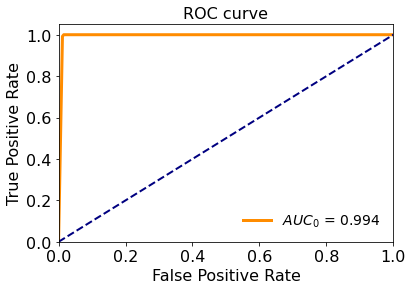

____________________________________
****** VALORE DI AUC *******
0.9941488648052355
____________________________________
****** ROC CURVE: con metodo diretto *******


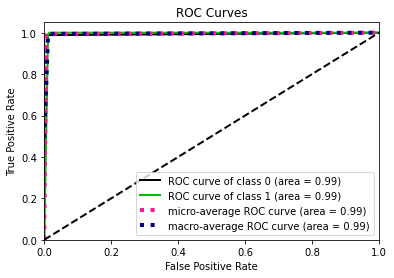

____________________________________
****** Precision recall: con metodo diretto *******


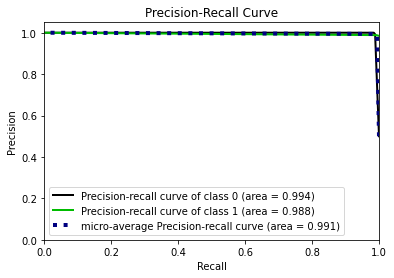

____________________________________
****** Cumulative gain: con metodo diretto *******


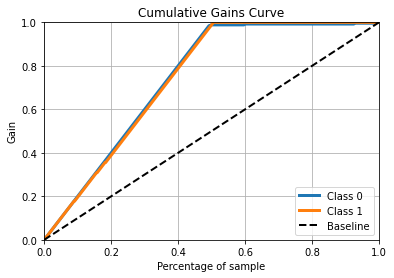

____________________________________
****** Lift curve: con metodo diretto *******


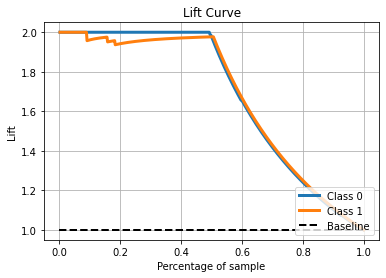

518
518
**** Matrice di Confusione *****
 True negative: 255 False negative: 0
 True positive: 259 False positive: 4
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.9923
Numero di campioni correttamente correlati:  514
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.9848
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 1.0000
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.9846
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.9923
____________________________________________
              precision    recall  f1-scor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass normalize=False as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


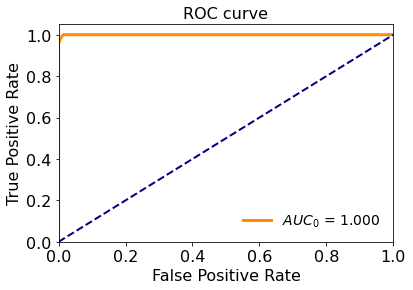

____________________________________
****** VALORE DI AUC *******
0.9997540287115577
____________________________________
****** ROC CURVE: con metodo diretto *******


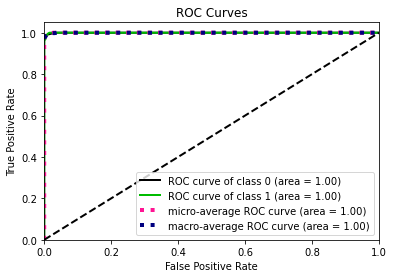

____________________________________
****** Precision recall: con metodo diretto *******


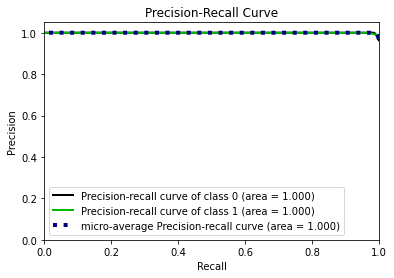

____________________________________
****** Cumulative gain: con metodo diretto *******


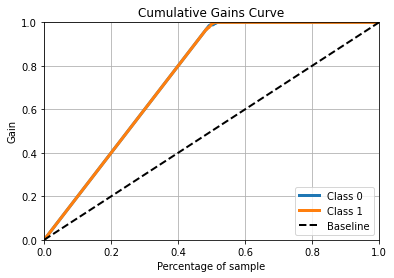

____________________________________
****** Lift curve: con metodo diretto *******


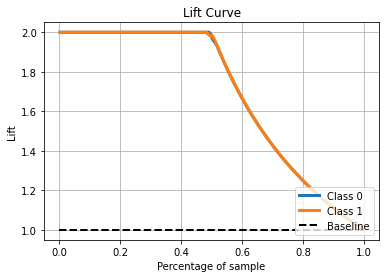

518
518
**** Matrice di Confusione *****
 True negative: 255 False negative: 0
 True positive: 259 False positive: 4
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.9923
Numero di campioni correttamente correlati:  514
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.9848
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 1.0000
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.9846
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.9923
____________________________________________
              precision    recall  f1-scor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass normalize=False as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


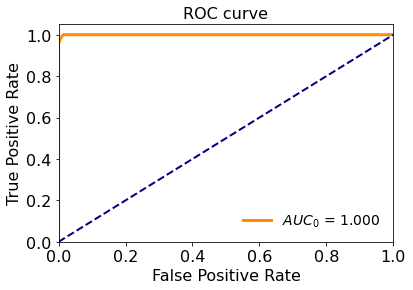

____________________________________
****** VALORE DI AUC *******
0.9997540287115577
____________________________________
****** ROC CURVE: con metodo diretto *******


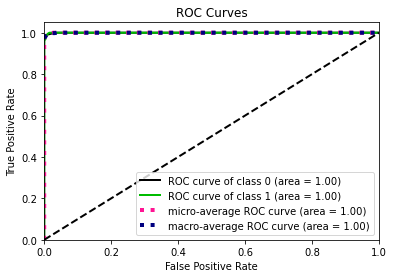

____________________________________
****** Precision recall: con metodo diretto *******


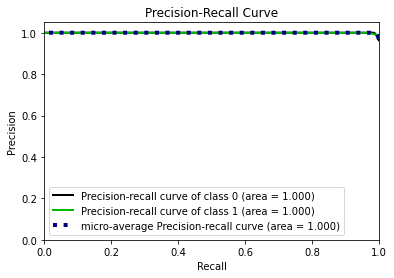

____________________________________
****** Cumulative gain: con metodo diretto *******


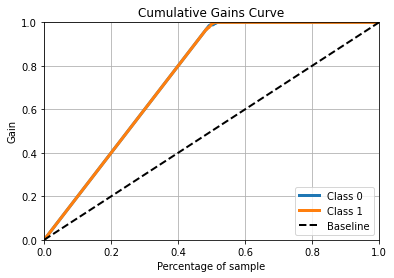

____________________________________
****** Lift curve: con metodo diretto *******


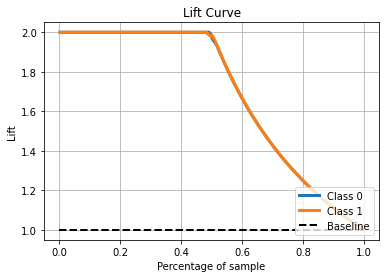

In [66]:
model = KNeighborsClassifier(n_neighbors=2, weights='distance', metric="manhattan")
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(len(y_pred))
print(len(y_val))
result_pred(y_val, y_pred)
y_score = model.predict_proba(X_val)
plot_res(y_pred, y_score, y_val)

model = KNeighborsClassifier(n_neighbors=25, weights='distance', metric="manhattan")
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(len(y_pred))
print(len(y_val))
result_pred(y_val, y_pred)
y_score = model.predict_proba(X_val)
plot_res(y_pred, y_score, y_val)

model = KNeighborsClassifier(n_neighbors=29, weights='distance', metric="manhattan")
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(len(y_pred))
print(len(y_val))
result_pred(y_val, y_pred)
y_score = model.predict_proba(X_val)
plot_res(y_pred, y_score, y_val)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)
rus = RandomOverSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

**** Matrice di Confusione *****
 True negative: 278 False negative: 37
 True positive: 34 False positive: 92
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.7075
Numero di campioni correttamente correlati:  312
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.2698
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 0.4789
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.7514
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.3452
____________________________________________
              precision    recall  f1-score   sup

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass normalize=False as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


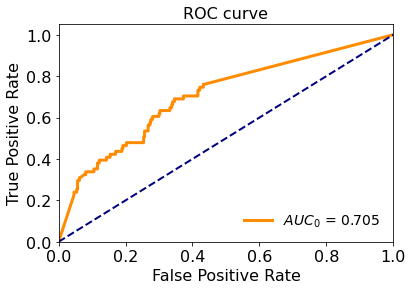

____________________________________
****** VALORE DI AUC *******
0.7047011800532927
____________________________________
****** ROC CURVE: con metodo diretto *******


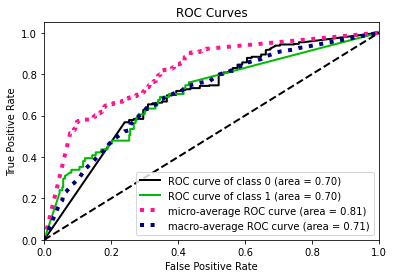

____________________________________
****** Precision recall: con metodo diretto *******


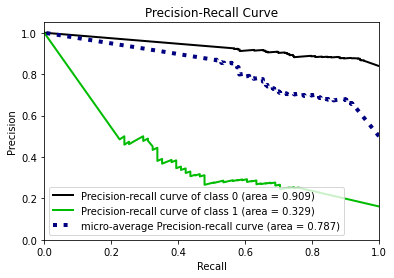

____________________________________
****** Cumulative gain: con metodo diretto *******


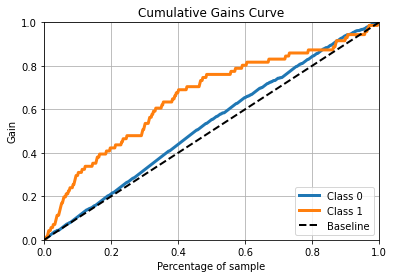

____________________________________
****** Lift curve: con metodo diretto *******


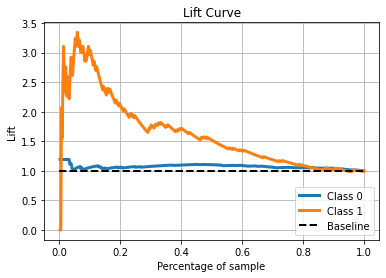

In [69]:
model = KNeighborsClassifier(n_neighbors=6, weights='distance', metric="manhattan")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
result_pred(y_test, y_pred)
y_score = model.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

## Learning Curve KNN Oversampled

In [82]:
def plot_knn_over(X, y):
    
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    estimator = KNeighborsClassifier(n_neighbors=6, weights='distance', metric="manhattan")
    title = "Learning Curves K-Nearest Neighbor"
    plot_learning_curve(estimator, title, X, y, axes=axes[0], ylim=(0.3, 1.01),
                        cv=cv, n_jobs=10)

    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    #estimator = KNeighborsClassifier(n_neighbors=14, weights='distance', metric="euclidean")
    estimator = KNeighborsClassifier(n_neighbors=6, weights='uniform', metric="manhattan")
    title = "Learning Curves K-Nearest Neighbor"
    plot_learning_curve(estimator, title, X, y, axes=axes[1], ylim=(0.3, 1.01),
                        cv=cv, n_jobs=10)
    
    
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    #estimator = KNeighborsClassifier(n_neighbors=14, weights='distance', metric="euclidean")
    estimator = KNeighborsClassifier(n_neighbors=6, weights='distance', metric="euclidean")
    title = "Learning Curves K-Nearest Neighbor"
    plot_learning_curve(estimator, title, X, y, axes=axes[2], ylim=(0.3, 1.01),
                        cv=cv, n_jobs=10)
    
    
    plt.show()

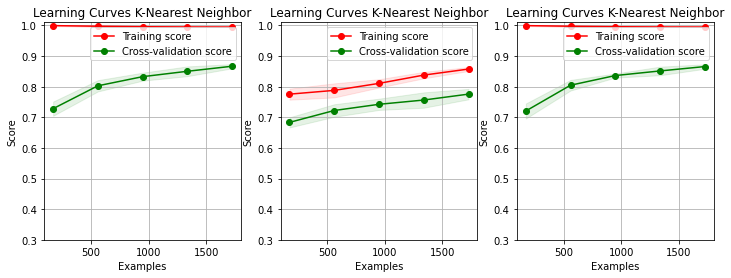

In [84]:
rus = RandomOverSampler(random_state=42)
X_train, y_train = rus.fit_resample(X, y)
plot_knn_over(X_train, y_train)

# ------- Test KNN con Oversampling sul Training -------

In [170]:
def builtOverTrGridSearch(X, y, split_size, tuned_parameters, scores, kfold):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size, random_state=1000, stratify=y)
    rus = RandomOverSampler(random_state=42)
    X_train, y_train = rus.fit_resample(X_train, y_train)
       

    optimals = {}
    for score in scores:
        print("------- Score = " + str(score) + " ------- \n")
        model = KNeighborsClassifier()
        k_fold = StratifiedKFold(n_splits=kfold, random_state=42)
        
        print("> Fold = " + str(k_fold) + "\n")
        clf = GridSearchCV(model, tuned_parameters, cv=k_fold, scoring=score)

        clf.fit(X_train, y_train)

        print("> Best Parameter set: \n")
        best = clf.best_params_
        print(best)
        
        print("\n> Grid scores:\n")
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']

        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']

        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))

        print("-> Report\n") 
        y_true, y_pred = y_test, clf.predict(X_test)
        print(classification_report(y_true, y_pred))
        print("\n")
        print("**** Matrice di Confusione *****")
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        print(' True negative: %d False negative: %d' % (tn, fn))
        print(' True positive: %d False positive: %d' % (tp, fp))
        print("____________________________________________")
        
        optimals[score] = best
    return optimals

In [171]:
optimal = builtOverTrGridSearch(X, y, 0.3, tuned_parameters, scores, 4)

------- Score = f1 ------- 

> Fold = StratifiedKFold(n_splits=4, random_state=42, shuffle=False)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


> Best Parameter set: 

{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}

> Grid scores:

0.909 (+/-0.043) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.928 (+/-0.023) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.881 (+/-0.031) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.897 (+/-0.018) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.858 (+/-0.036) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.900 (+/-0.017) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.841 (+/-0.029) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.889 (+/-0.014) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.816 (+/-0.057) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.897 (+/-0.013) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
0.809 (+/-0.040) for {'metric': 'euclid

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


> Best Parameter set: 

{'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}

> Grid scores:

0.954 (+/-0.058) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.993 (+/-0.014) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.970 (+/-0.025) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.997 (+/-0.012) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.898 (+/-0.050) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.998 (+/-0.008) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.919 (+/-0.057) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.999 (+/-0.004) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.839 (+/-0.084) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
0.861 (+/-0.075) for {'metric': 'euclid

In [172]:
optimal

{'f1': {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'},
 'recall': {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}}

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)
rus = RandomOverSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

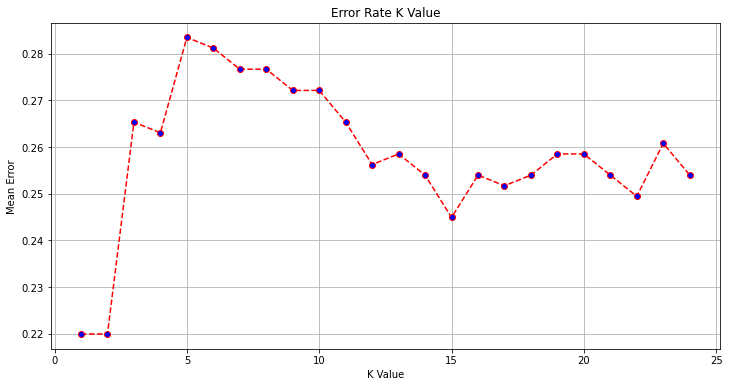

In [174]:
error = []
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance', metric="euclidean")
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1,25), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue')
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid()

In [208]:
knn = KNeighborsClassifier(n_neighbors=11, weights='uniform', metric="manhattan")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [209]:
result_pred(y_test, y_pred)

**** Matrice di Confusione *****
 True negative: 283 False negative: 25
 True positive: 46 False positive: 87
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.7460
Numero di campioni correttamente correlati:  329
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.3459
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 0.6479
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.7649
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.4510
____________________________________________
              precision    recall  f1-score   sup

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass normalize=False as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


****** ROC CURVE + AUC?: passo passo *******


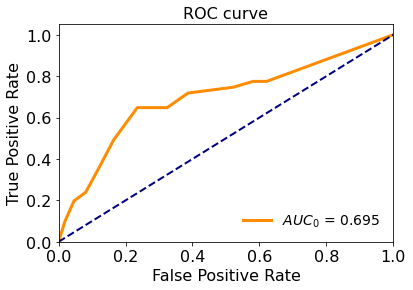

____________________________________
****** VALORE DI AUC *******
0.6948800913589646
____________________________________
****** ROC CURVE: con metodo diretto *******


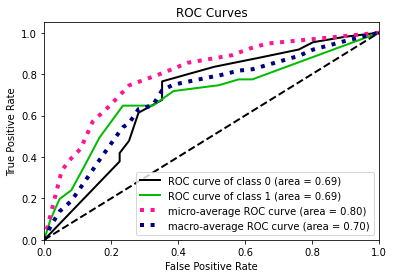

____________________________________
****** Precision recall: con metodo diretto *******


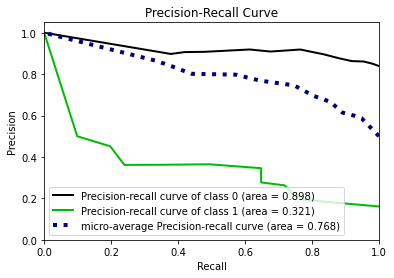

____________________________________
****** Cumulative gain: con metodo diretto *******


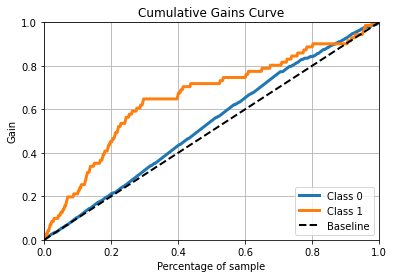

____________________________________
****** Lift curve: con metodo diretto *******


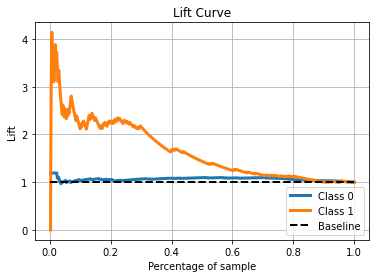

In [210]:
y_score = knn.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

## Learning Curve KNN Oversampled

In [211]:
def plot_knn_over(X, y):
    
    fig, axes = plt.subplots(3, 2, figsize=(10, 15))

    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    estimator = KNeighborsClassifier(n_neighbors=11, weights='uniform', metric="manhattan")
    title = "Learning Curves K-Nearest Neighbor"
    plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.3, 1.01),
                        cv=cv, n_jobs=10)

    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    #estimator = KNeighborsClassifier(n_neighbors=14, weights='distance', metric="euclidean")
    estimator = KNeighborsClassifier(n_neighbors=11, weights='distance', metric="euclidean")
    title = "Learning Curves K-Nearest Neighbor"
    plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.3, 1.01),
                        cv=cv, n_jobs=10)
    plt.show()

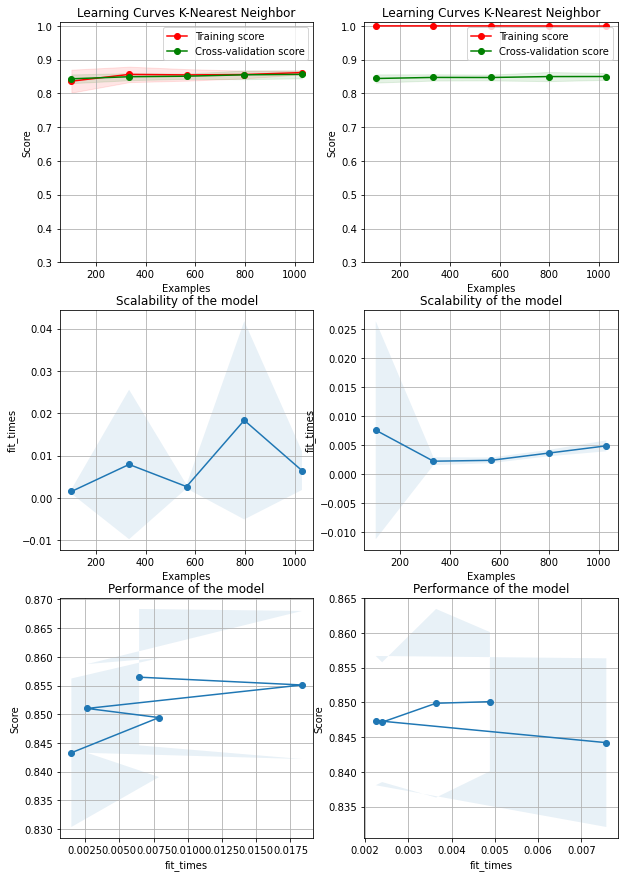

In [212]:
plot_knn_over(X, y)